Author: Vaasudevan Srinivasan <br>
Created on: June 27, 2021

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import make_circles
from tensorflow.keras.utils import plot_model
from tqdm.keras import TqdmCallback
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd

tf.__version__

'2.5.0'

# Binary Classfication (Pizza / Steak)

In [ ]:
%%capture

!wget -nc https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
!unzip -o pizza_steak

In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0 / 255,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train = train_datagen.flow_from_directory('pizza_steak/train',
                                          batch_size=64,
                                          seed=123,
                                          target_size=(224, 224),
                                          class_mode='binary')

val = test_datagen.flow_from_directory('pizza_steak/test',
                                       batch_size=64,
                                       seed=123,
                                       target_size=(224, 224),
                                       class_mode='binary')

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


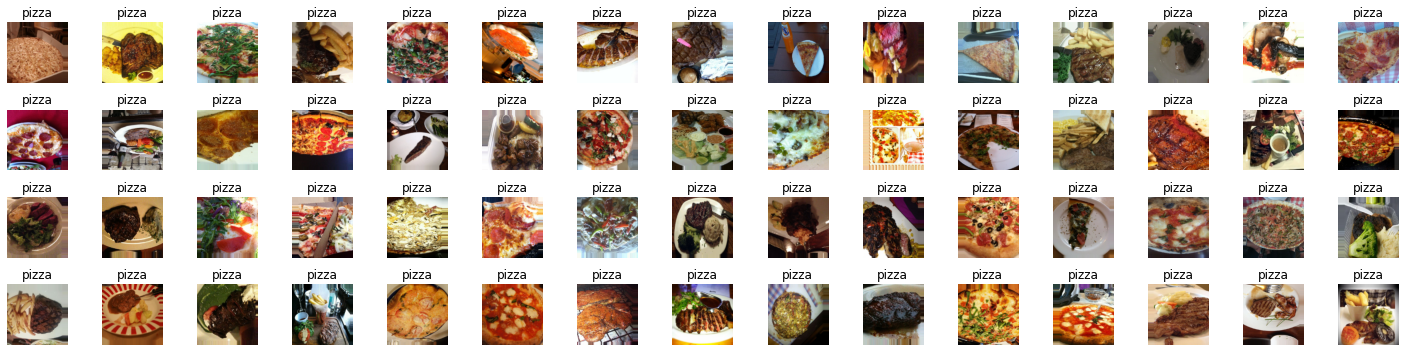

In [ ]:
# Get the images from a batch
imgs = train.next()
labels = list(train.class_indices.keys())

# Plot
plt.figure(figsize=(20, 5))
cols, rows = 15, 4
for i in range(cols * rows):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(imgs[0][i])
    plt.title(labels[np.argmax(imgs[1][i])])
    plt.axis('off')

plt.tight_layout();

In [ ]:
# Model

tf.random.set_seed(1996)

model = tf.keras.models.Sequential([
    InputLayer(input_shape=(224, 224, 3)),
    Conv2D(filters=8, kernel_size=3, activation='relu'),
    Conv2D(filters=8, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, padding='valid'),
    Conv2D(filters=8, kernel_size=3, activation='relu'),
    Conv2D(filters=8, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(filters=8, kernel_size=3, activation='relu'),
    Conv2D(filters=8, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

h = model.fit(train, validation_data=val, epochs=10,
              callbacks=[TqdmCallback(verbose=0)], verbose=0)

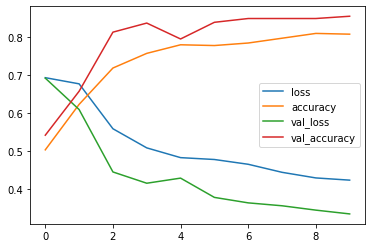

In [ ]:
pd.DataFrame(h.history).plot();

# Multiclass Classification

In [ ]:
%%capture

!wget -nc https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
!unzip -o 10_food_classes_all_data

In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0 / 255,
                                   horizontal_flip=True,
                                   rotation_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train = train_datagen.flow_from_directory('10_food_classes_all_data/train',
                                          batch_size=32,
                                          seed=123,
                                          target_size=(224, 224))

val = test_datagen.flow_from_directory('10_food_classes_all_data/test',
                                       batch_size=32,
                                       seed=32,
                                       target_size=(224, 224))

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


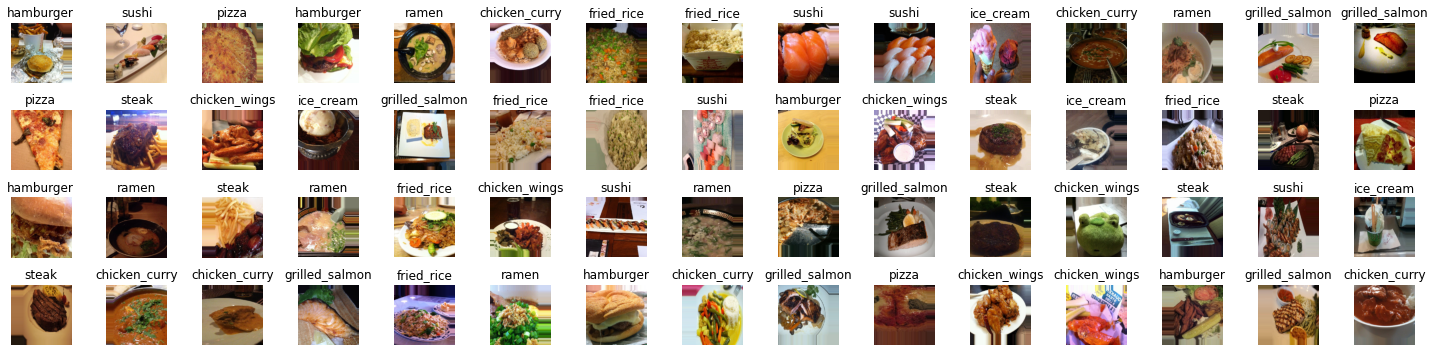

In [ ]:
# Get the images from a batch
imgs = train.next()
labels = list(train.class_indices.keys())

# Plot
plt.figure(figsize=(20, 5))
cols, rows = 15, 4
for i in range(cols * rows):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(imgs[0][i])
    plt.title(labels[np.argmax(imgs[1][i])])
    plt.axis('off')

plt.tight_layout();

In [ ]:
# Model

tf.random.set_seed(1996)

model = tf.keras.models.Sequential([
    InputLayer(input_shape=(224, 224, 3)),
    Conv2D(filters=10, kernel_size=3, activation='relu'),
    Conv2D(filters=10, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, padding='valid'),
    Conv2D(filters=10, kernel_size=3, activation='relu'),
    Conv2D(filters=10, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

h = model.fit(train, validation_data=val, epochs=50,
              steps_per_epoch=len(train),
              validation_steps=len(val),
              callbacks=[TqdmCallback(verbose=0)], verbose=0)